To calculate the probability of an agent at the boundary of a circle of radius R
with an angle of vision 45 degrees, seeing the centre of a target of radius delta.

r = R-delta
centre of target must be on or inside circle of radius r.

Lines defining area of vision of the agent are
y=x/2+R and y=-(x/2+R) (assume that the agent is at the edge of the circle radius R, x =0).

centre of the target can be anywhere with a circle of radius r (inside the circle of radius R) except in the sectors above and below where those lines (the chords) intersect the circle.


If S1 and S2 are the areas above those chords, then S1=S2=S say. If A is the area of the circle of radius r,  then probability of agent seeing target is
(A-2S)/A

Original angle is -0.0
Other angles are: 22.5 and -22.5
Intersection points of first line with circle are: [-45.0, 31.81980515339464]
Intersection points of second line with circle are: [-45.0, 31.81980515339464]


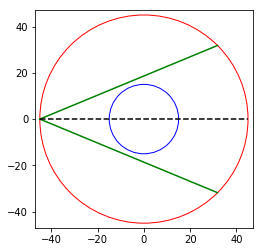

In [24]:
#Try to draw an example
import numpy as np 
import matplotlib.pyplot as plt
import math
import sys

def solve_quadratic2(a,b,c):
    #print("a,b and c are: " + str(a) + "," + str(b) + "," + str(c))
    solns = []
    val1 = -b/(2*a)
    val2 = ((b*b) - 4*a*c)
    val3 = ((b*b) - 4*a*c)/(4*a*a)
    #print("val2 is " + str(val2))
    if val3<0:
        print("No solutions to quadratic")
    else:
        val4= math.sqrt(val3)
        solns.append(val1-val4)
        solns.append(val1+val4)
    
    return solns

R=45
delta = 30
#point of interest
x0 = -(4*R)/4
y0 = math.sqrt(R*R - x0*x0)
#alpha = (1*math.pi/8) #angle of arrival with respect to perp to tangent (spoke)
alpha=0
r=R-delta

angle0 = math.atan(y0/x0)
angle1 = math.atan(y0/x0) + alpha + math.pi/8
angle2 = math.atan(y0/x0) + alpha - math.pi/8
print("Original angle is " + str(math.degrees(angle0)))
print("Other angles are: " + str(math.degrees(angle1)) + " and " +str(math.degrees(angle2)))

xmin = -(R+2)  
xmax = R+2
ymin = -(R+2)
ymax = (R+2)


if (not (abs(angle1)==math.pi/2 or abs(angle1)==3*math.pi/2)): 
    m1 = math.tan(angle1)
    c1 = y0 - m1*x0
else:
    m1 =100
    
if (not (abs(angle2)==math.pi/2 or abs(angle2)==3*math.pi/2)):     
    m2 = math.tan(angle2)
    c2 = y0 - m2*x0
else: m2 = -100
    
m3 = (m1+m2)/2  #grad of line of travel
c3 = y0 - m3*x0

def line1(x):
    return (m1*x + c1)

def line2(x):
    return (m2*x +c2)

def line3(x):
    return (m3*x +c3)

def create_circle(x0,y0,rad,str):
    circle= plt.Circle((x0,y0), radius= rad, fill=False, color = str)
    return circle




circle1 = create_circle(0,0,R,'r')
circle2 = create_circle(0,0,r,'b')

ax = plt.gca();
ax.add_artist(circle1); 
ax.add_artist(circle2);
ax.set_xlim(xmin, xmax); 
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

solns1 = solve_quadratic2(1+m1*m1, 2*m1*c1, c1*c1 - R*R)
#solns1.sort()
solns2 = solve_quadratic2(1+m2*m2, 2*m2*c2, c2*c2 - R*R)
#solns2.sort()
solns3 = solve_quadratic2(1+m3*m3, 2*m3*c3, c3*c3 - R*R)

print("Intersection points of first line with circle are: " + str(solns1))
print("Intersection points of second line with circle are: " + str(solns2))
    
if (not (abs(angle1)==math.pi/2 or abs(angle1)==3*math.pi/2)): 
    plt.plot([solns1[0], solns1[1]],[line1(solns1[0]),line1(solns1[1])],'g')
    
else:
    plt.plot([x0, x0],[y0,-y0],'g')

if (not (abs(angle2)==math.pi/2 or abs(angle2)==3*math.pi/2)): 
    plt.plot([solns2[0], solns2[1]],[line2(solns2[0]),line2(solns2[1])],'g')

else:
    plt.plot([x0, x0],[y0,-y0],'g')
    
plt.plot([solns3[0], solns3[1]],[line3(solns2[0]),line3(solns3[1])],'k--')



#plt.plot([x0,0],[y0,0])
plt.savefig('example1.png') 
plt.plot()
plt.show()


In [21]:


def solve_quadratic(a,b,c):
    #print("a,b and c are: " + str(a) + "," + str(b) + "," + str(c))
    solns = []
    val1 = -b/(2*a)
    val2 = ((b*b) - 4*a*c)
    val3 = ((b*b) - 4*a*c)/(4*a*a)
    #print("val2 is " + str(val2))
    if val3<0:
        print("No solutions to quadratic")
    else:
        val4= math.sqrt(val3)
        solns.append(val1-val4)
        solns.append(val1+val4)
    
    return solns

def sector_angle(y0,y1,r):
    theta0 = math.degrees(math.asin(y0/r))
    #print("theta_0 is " + str(theta0))
    theta1 = math.degrees(math.asin(y1/r))
    #print("theta_1 is " + str(theta1))
    theta = 180 - theta0 - theta1
    return theta


def sector_area(theta,r):
    return (theta*math.pi*r*r)/float(360)

def circular_area(r):
    return math.pi*r*r

def isosceles_area(theta,r):
    return (r*r*math.fabs(math.cos(theta/2)*math.sin(theta/2)))

def find_probability(R,d):
    #for given radii of outer circle (R) and target (d)
    #return a comma-separated string consisting of:
    #R, d, p
    #where p is the probability of agent seeing the target
    
    r=float(R-d)
    s=str(R) + "," + str(d) + ","
    solns = solve_quadratic(1.25,float(R/2),float(((R*R)/4) - r*r))
    
    if solns==[]:
        system.exit()  
    
    x0=solns[0]
    x1=solns[1]
    y0=line1(x0)
    y1=line1(x1)
    outer_circular_area = circular_area(R)
    inner_circular_area = circular_area(r)
    theta = sector_angle(y0,y1,r)
    sect_area = sector_area(theta,r)
    isos_area = isosceles_area(theta,r)
    chord_area = sect_area - isos_area
    
    
    viewable = inner_circular_area - 2*chord_area 
    prob_view = viewable/inner_circular_area
    return s+str(prob_view)
    
    
        
        


#start the main program here
    
    
#solns0 = solve_quadratic(1.25,float(R/2),float(((R*R)/4) - r*r))
solns0 = solve_quadratic(3,4*R,float(2*R*R - r*r))

if solns0==[]:
    print('graceful exit')
    sys.exit()
    

x00=solns0[0]
x10=solns0[1]

y00=line1(x00)
y10=line1(x10)
print("The points of intersection of line 1 are:\n")
print("(" + str(x00) + "," + str(y00) + ")\n")
print("(" + str(x10) + "," + str(y10) + ")\n")


y01=line2(x00)
y11=line2(x10)
print("The points of intersection of line 2 are:\n")
print("(" + str(x00) + "," + str(y01) + ")\n")
print("(" + str(x10) + "," + str(y11) + ")\n")
    
circle1 = create_circle(0,0,R,'r')
circle2 = create_circle(0,0,r,'b')

ax = plt.gca();
ax.add_artist(circle1); 
ax.add_artist(circle2);
ax.set_xlim(xmin, xmax); 
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')
    
plt.plot([xmin, xmax],[line1(xmin),line1(xmax)],'g')
plt.plot([xmin, xmax],[line1(xmin),line1(xmax)],'g')
plt.plot([xmin, xmax],[line2(xmin),line2(xmax)],'g')
plt.plot([xmin, xmax],[line2(xmin),line2(xmax)],'g')

plt.plot([0,x00],[0,y00],'k--')
plt.plot([0,x10],[0,y10],'k--')
plt.plot([0,x00],[0,y01],'k--')
plt.plot([0,x10],[0,y11],'k--')


plt.savefig('example1.png')    
plt.show()

No solutions to quadratic
graceful exit


SystemExit: 

/home/alex/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


The viewable area is bounded by the green lines and the blue circle

In [5]:

    
outer_circular_area = circular_area(R)
inner_circular_area = circular_area(r)
theta = sector_angle(y00,y10,r)
sect_area = sector_area(theta,r)
isos_area = isosceles_area(theta,r)
chord_area = sect_area - isos_area
    
    
viewable = inner_circular_area - 2*chord_area #the area in which centre of the target can be placed to be viewable by the agent
prob_view = viewable/inner_circular_area
    
print("The area of the large circle is " + str(outer_circular_area))
print("The area of the small circle is " + str(inner_circular_area))
print("The angle between the points of intersection is " + str(theta))
print("The area of the sector is " + str(sect_area))
print("The area of the isosceles is " + str(isosceles_area))
print("The area of each chord is " + str(chord_area))
print("The area viewable to the agent is " + str(viewable))
print("The probability that a target is viewable to the agent is " + str(prob_view))

NameError: name 'y00' is not defined

Now find the probability for a range of values, without the comments

In [9]:
f = open("example1_data.txt", 'w')

R=20
while R<101:
    d=5
    while d<=R/2:
        newString = find_probability(R,d) + "\n"
        print(newString)
        f.write(newString)
        d+=5
    R+=10
f.close()

ValueError: math domain error